#  0. 데이터 확인

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것이다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있다.

# 1. Import Library and Read File

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/TelcoCustomerChurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2. 탐색적 데이터 분석 (Exploratory data analysis)

- (churn = Yes)
- correlation between tenure and churn
- correlation between phone service and churn
- correlation between a kind of contract and churn
- correlation between a kind of Internet Service and churn
- correlation between whether the using of online security service and churn
- correlation between total charges and churn

- 자료 구조 파악

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


** TotalCharges가 숫자로 보이지만, str 타입임. 타입 변경 필요할지도

- 기본 통계 정보 파악

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- 수치형 변수 탐색

In [11]:
df['tenure'].max()

72

In [13]:
df['tenure'].mean()

32.37114865824223

In [15]:
df['tenure'].quantile([0.25,0.75])

0.25     9.0
0.75    55.0
Name: tenure, dtype: float64

In [17]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [19]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [21]:
df.groupby('Contract').describe().T

Contract              Month-to-month     One year     Two year
SeniorCitizen  count     3875.000000  1473.000000  1695.000000
               mean         0.208258     0.128988     0.085546
               std          0.406115     0.335301     0.279775
               min          0.000000     0.000000     0.000000
               25%          0.000000     0.000000     0.000000
               50%          0.000000     0.000000     0.000000
               75%          0.000000     0.000000     0.000000
               max          1.000000     1.000000     1.000000
tenure         count     3875.000000  1473.000000  1695.000000
               mean        18.036645    42.044807    56.735103
               std         17.689054    19.035883    18.209363
               min          1.000000     0.000000     0.000000
               25%          3.000000    27.000000    48.000000
               50%         12.000000    44.000000    64.000000
               75%         29.000000    58.000000    71.000000
               max         72.000000    72.000000    72.000000
MonthlyCharges count     3875.000000  1473.000000  1695.000000
               mean        66.398490    65.048608    60.770413
               std         26.926599    31.840539    34.678865
               min         18.750000    18.250000    18.400000
               25%         45.850000    26.900000    24.025000
               50%         73.250000    68.750000    64.350000
               75%         88.875000    94.800000    90.450000
               max        117.450000   118.600000   118.750000

- 범주형 변수 탐색

In [23]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [25]:
df['OnlineSecurity'].unique()  #InternetService = No 인 경우, OnlineSecurity와 OnlineBackup 등 internet관련 서비스 이용여부에 No internet service 출력

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [31]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [33]:
df['TotalCharges'].value_counts('')

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

# 3. 결측치 확인 및 처리

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- 수치형 변수간의 correlation
    - 수치형 변수 : tenure, SeniorCitizen, MonthlyCharges, (TotalCharges)
    1. str 타입인 TotalCharges를 int나 float으로 바꾼다.
    2. 바뀌지 않는 값은 NaN이나 0으로 처리한다.
    3. NaN 혹은 0 인 값은 drop한다.

In [38]:
# TotalCharges 을 숫자형으로 변환 (변환 불가능한 값은 NaN으로 처리)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 변환 후 TotalCharges의 데이터 타입 확인
print(df['TotalCharges'].dtype) 

float64


In [40]:
# NaN 값을 0으로 대체
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2387754445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# NaN이 포함된 행 제거
# df = df.dropna(subset=['TotalCharges'])

In [42]:
# 컬럼 삭제
# 숫자형 변수 분석시에 interrupt되는 customerID 제거 (계속 str값이 포함되어 float으로 바꿀수 없다고 valueError남)

df = df.drop(columns=['customerID'])

- churn 컬럼의 문자열을 숫자형으로 변경

In [44]:
# Churn 컬럼의 분포 확인
# Churn Yes : 이탈 , No : 이탈안함. 언밸런스하게 No쪽이 많은 차지하고 있음

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [46]:
# 'Churn' 컬럼의 ['Yes', 'No'] -> [1, 0] 변경하기

df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\1631934684.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\1631934684.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace([

In [48]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [50]:
# 결측치 재확인

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# 4. 시각화

### 4-1. Correlation between numeric features

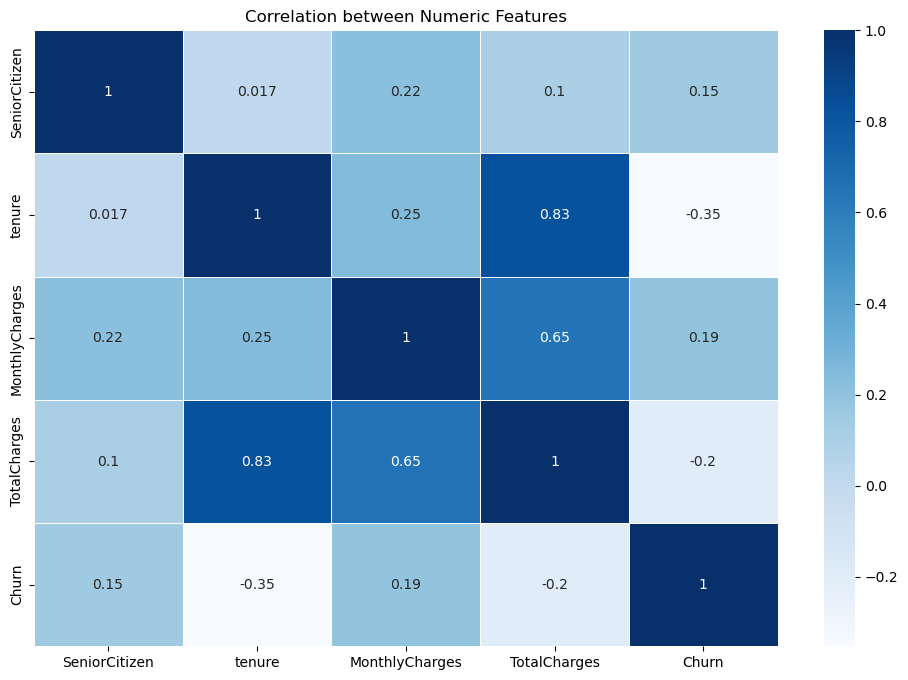

In [56]:
# 숫자형 변수만 포함하는 데이터프레임 생성 (원본 df는 변경하지 않음)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관관계 분석
correlation_matrix = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation between Numeric Features')
plt.show()

1. tenure 와 TotalCharges 간의 corr이 1에 가까움
2. MonthlyCharges와 TotalCharges가 그 다음으로 높음
3. Churn과 MonthlyCharges가 다른 변수에 비해 가장 높은 수치를 나타내지만 0에 가까운, corr이 너무 낮은 정도임

In [ ]:
%matplotlib inline

### 4-2. Bar

In [58]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: xlabel='gender'>

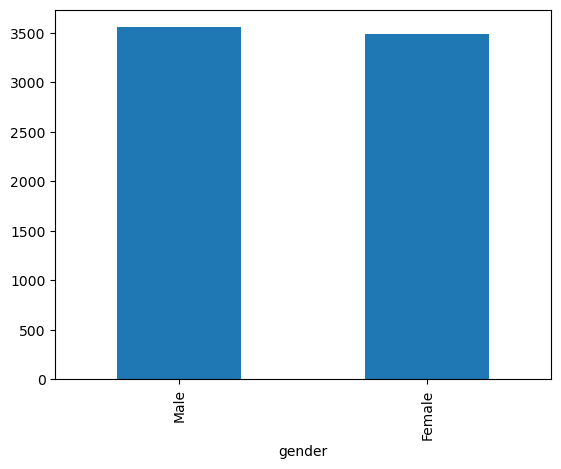

In [60]:
df['gender'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Partner 여부별 분포')

C:\Users\HHS\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HHS\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HHS\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HHS\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HHS\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HHS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLAB

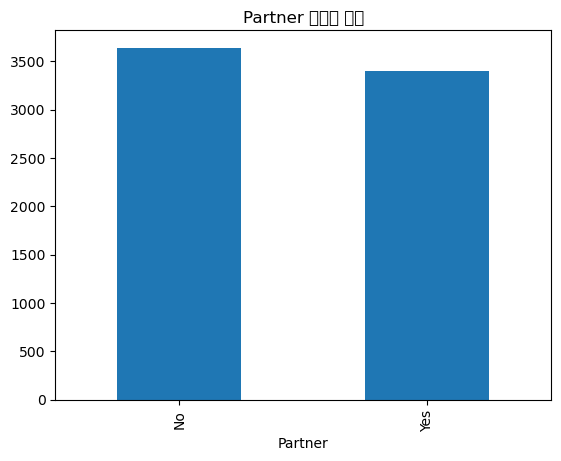

In [65]:
df['Partner'].value_counts().plot(kind='bar')
plt.title('Partner 여부별 분포')

### 4-2. Bar chart of Object types' column

In [68]:
# Object 타입의 컬럼
df.select_dtypes('O').columns.values

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


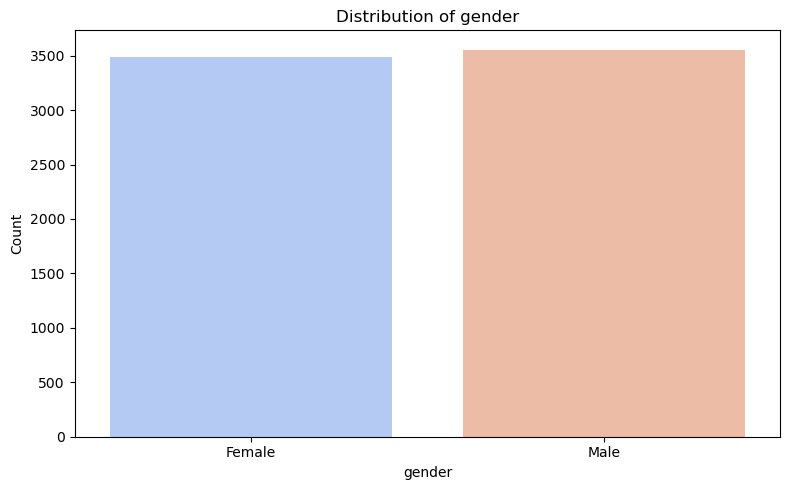

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


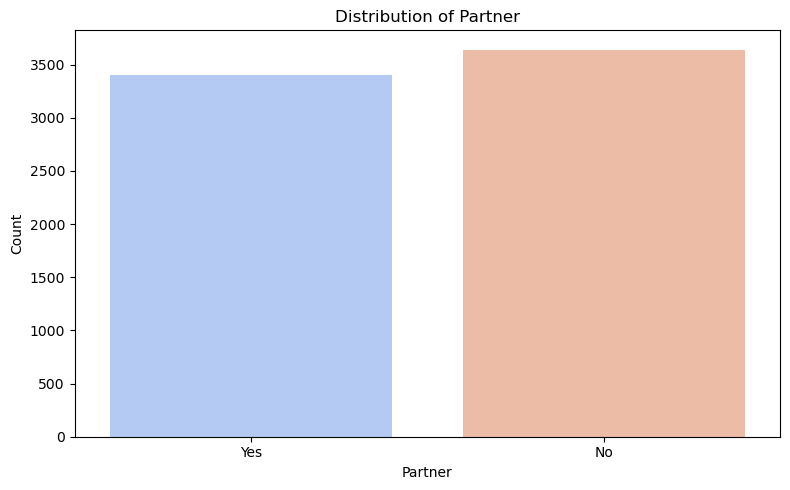

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


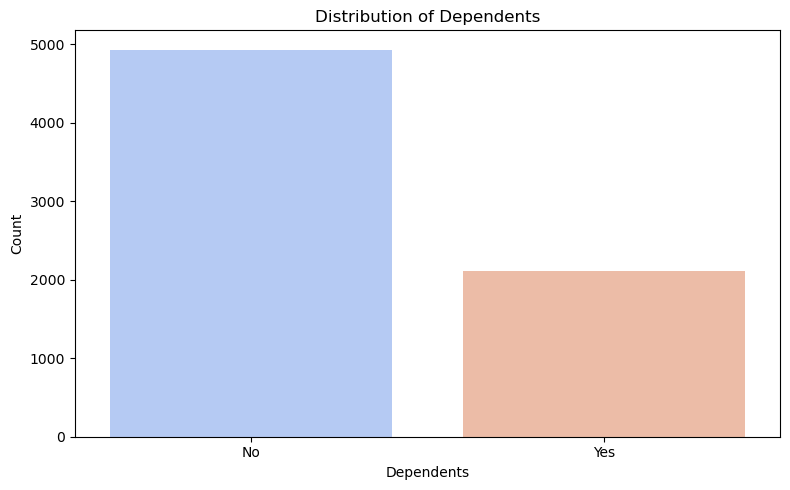

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


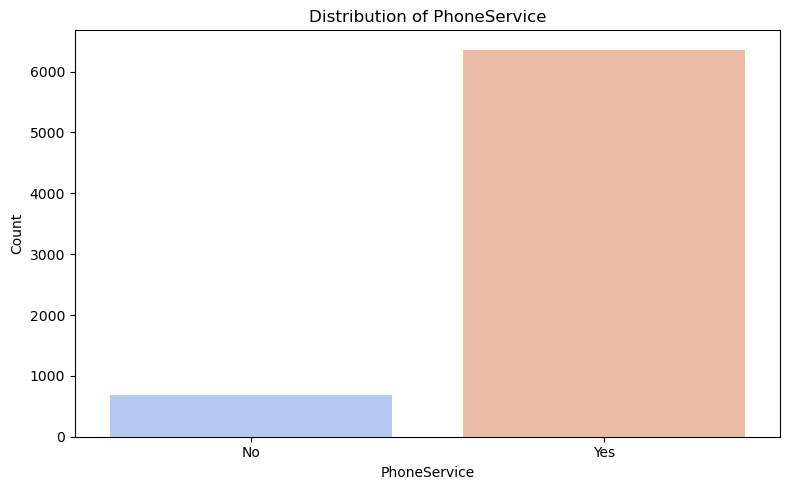

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


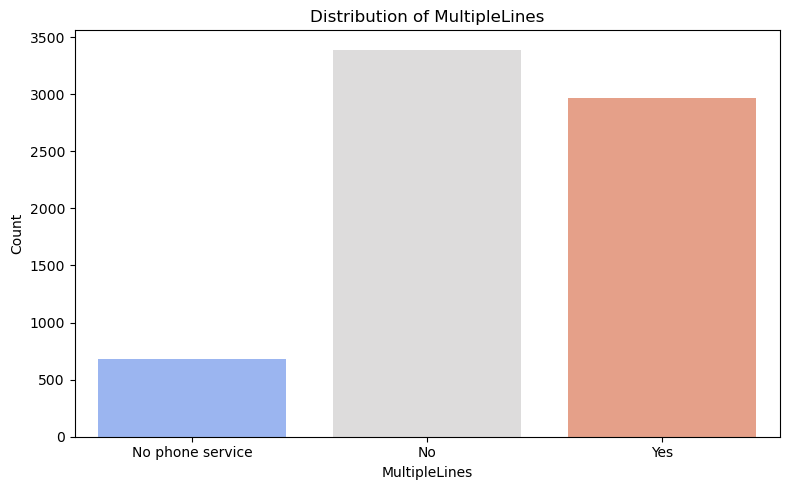

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


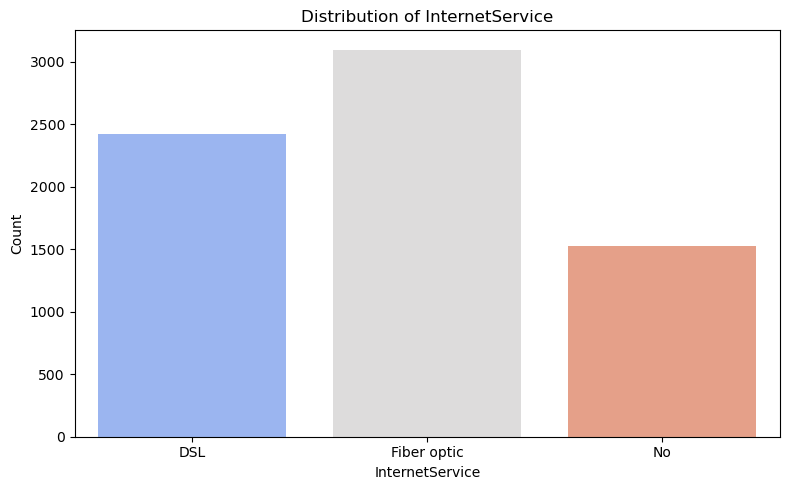

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


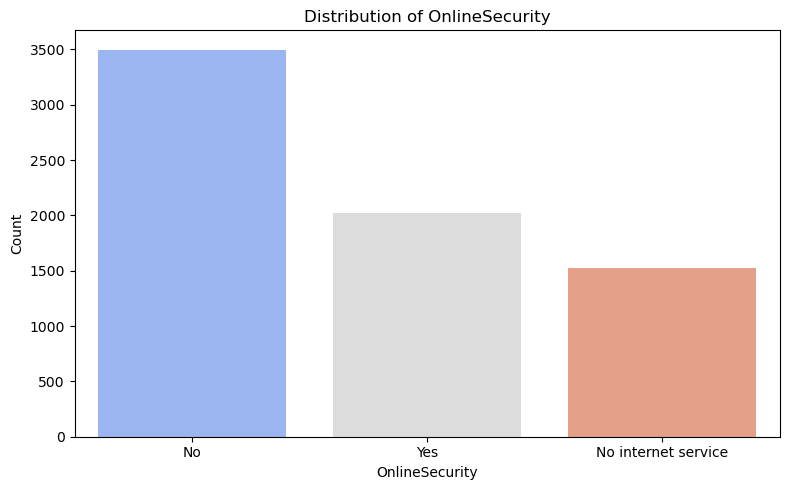

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


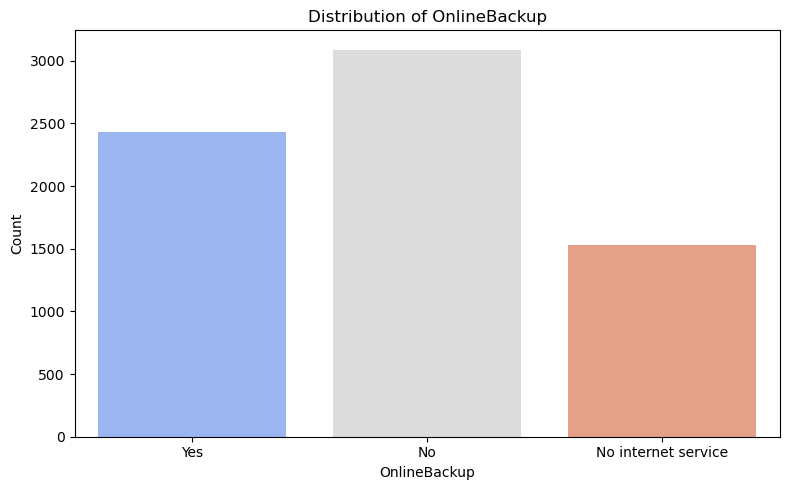

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


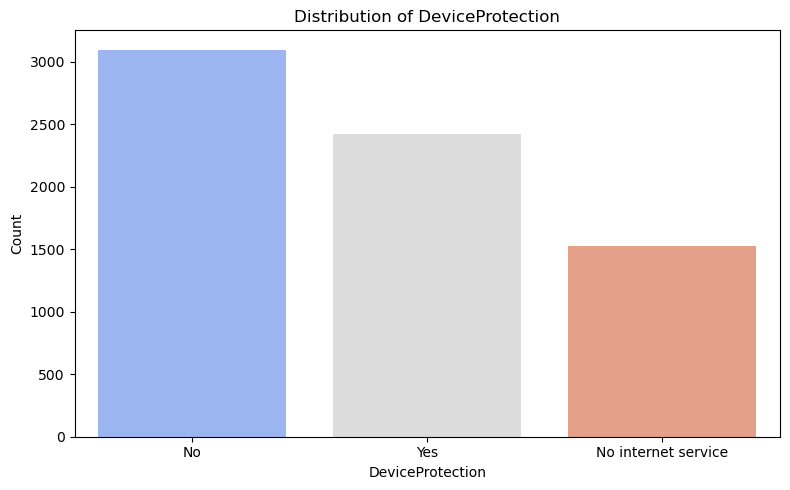

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


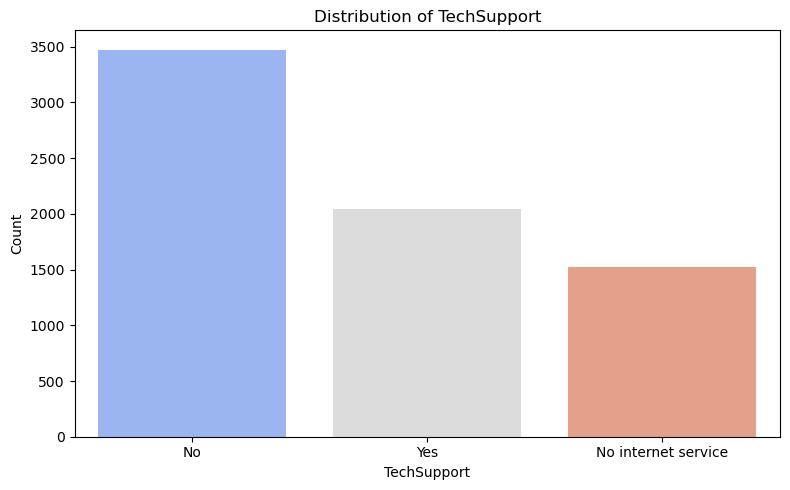

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


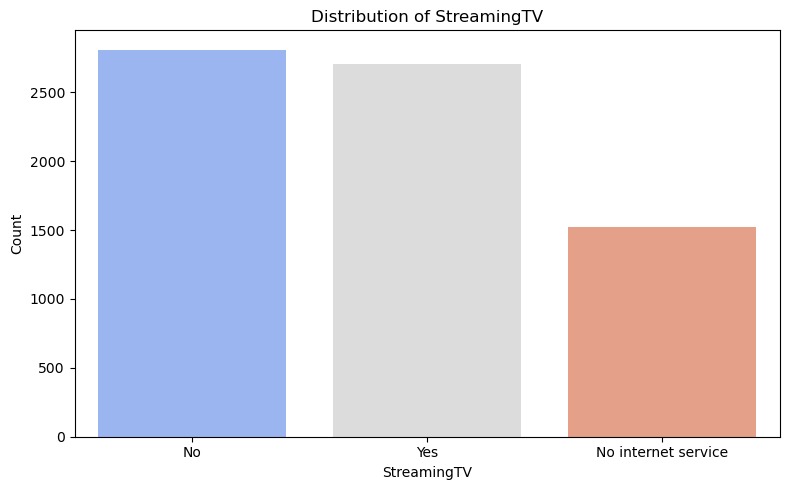

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


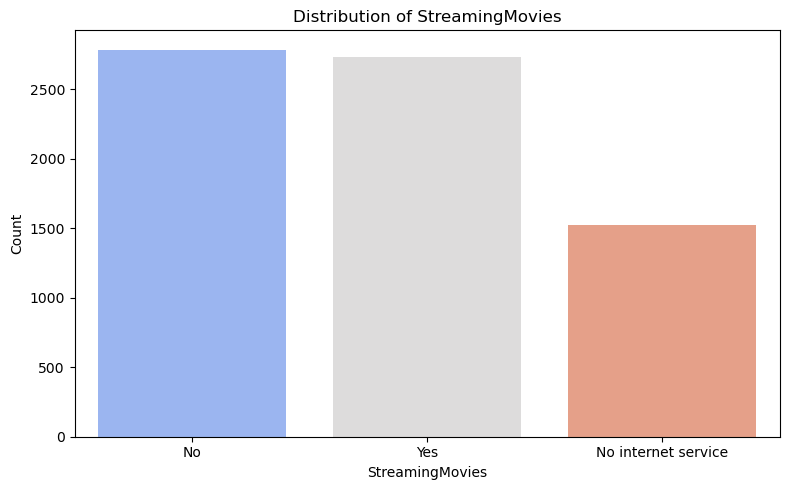

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


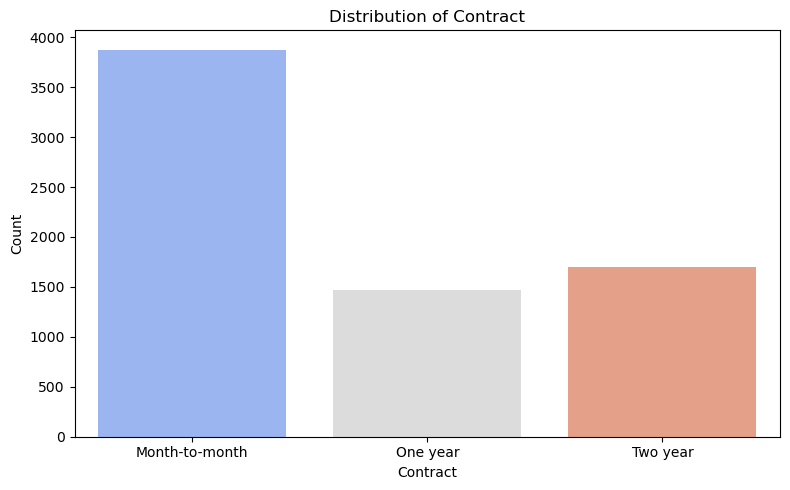

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


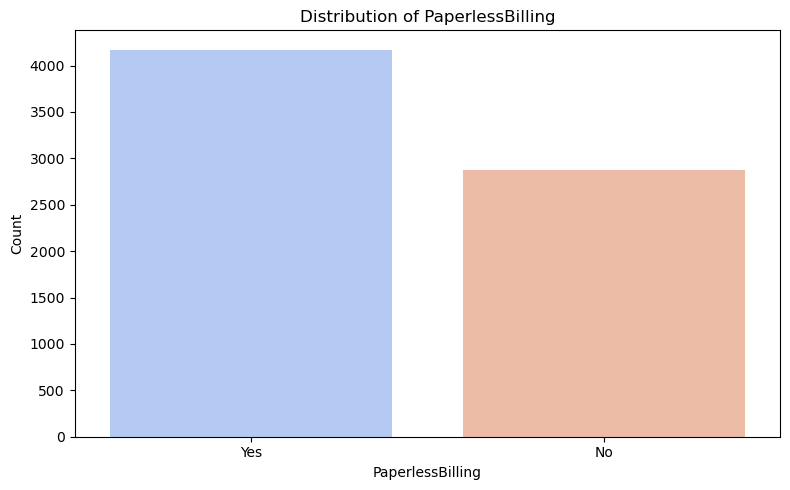

C:\Users\HHS\AppData\Local\Temp\ipykernel_17796\2576487978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용


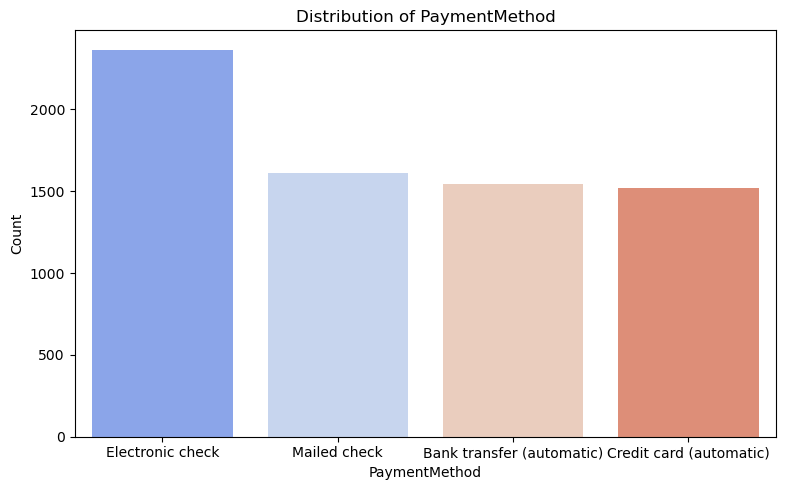

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수들 선택
object_list = df.select_dtypes('object').columns.values

# 각 컬럼에 대해 바 차트 생성
for col in object_list:
    plt.figure(figsize=(8, 5))  # 그래프 크기 지정
    sns.countplot(x=col, data=df, palette='coolwarm')  # seaborn을 사용해 팔레트 적용
    plt.title(f'Distribution of {col}')  # 제목 추가
    plt.xlabel(col)  # x축 라벨 추가
    plt.ylabel('Count')  # y축 라벨 추가
    plt.tight_layout()  # 레이아웃 조정
    plt.show()


### 4-2. Bar